### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [0]:
import tensorflow as tf
tf.reset_default_graph()
tf.set_random_seed(42)

#### Collect Fashion mnist data from tf.keras.datasets 

In [0]:
(trainX, trainY),(testX,testY) = tf.keras.datasets.fashion_mnist.load_data()

#### Change train and test labels into one-hot vectors

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)

In [0]:
trainY.shape

(60000, 10)

In [0]:
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [0]:
testY.shape

(10000, 10)

#### Build the Graph

#### Initialize model, reshape & normalize data

In [0]:
trainX.shape

(60000, 28, 28)

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model.add(tf.keras.layers.BatchNormalization())

#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [0]:
model.add(tf.keras.layers.Dense(200, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(100, activation='relu'))

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [0]:
model.add(tf.keras.layers.Dense(10, activation = 'relu'))
model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
model.summary()
# This is to check that the model is built with the requested layers, neurons and hyperparameters

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [0]:
model.fit(trainX,trainY,
         validation_data = (testX, testY),
         epochs = 20,
         batch_size = 32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 127us/sample - loss: 0.5878 - acc: 0.8335 - val_loss: 0.5537 - val_acc: 0.8383
Epoch 2/20
60000/60000 [==============================] - 8s 127us/sample - loss: 0.6084 - acc: 0.8296 - val_loss: 0.5468 - val_acc: 0.8359
Epoch 3/20
60000/60000 [==============================] - 8s 126us/sample - loss: 0.5749 - acc: 0.8301 - val_loss: 0.5632 - val_acc: 0.8387
Epoch 4/20
60000/60000 [==============================] - 8s 126us/sample - loss: 0.5635 - acc: 0.8447 - val_loss: 0.5187 - val_acc: 0.8486
Epoch 5/20
60000/60000 [==============================] - 8s 126us/sample - loss: 0.5398 - acc: 0.8430 - val_loss: 0.5352 - val_acc: 0.8395
Epoch 6/20
60000/60000 [==============================] - 8s 125us/sample - loss: 0.5262 - acc: 0.8445 - val_loss: 0.4918 - val_acc: 0.8523
Epoch 7/20
60000/60000 [==============================] - 8s 126us/sample - loss: 0.4924 - acc: 0.8540 - val_l

Epochs 10 & batch size 35 gave me validation accuracy of 83%. 
Increase in Epoch to 20 has further improved the accuracy to 87%. Though i am not allowed to play with the hidden layers and neurons to improve the accuracy further.

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

### **Load CIFAR10 dataset**

In [0]:
(X_train, Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()

In [0]:
X_train.shape

(50000, 32, 32, 3)

In [0]:
# Coverting labels to one hot vector
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=10)
Y_test = tf.keras.utils.to_categorical(Y_test, num_classes=10)

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizantally
    vertical_flip=False)  # randomly flip images

### **Prepare/fit the generator.**

In [0]:
datagen.fit(X_train)

In [0]:
X_train.shape

(50000, 32, 32, 3)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

In [0]:
from matplotlib import pyplot as plt

W0615 06:47:53.454629 140667683145600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0615 06:47:53.471518 140667683145600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0615 06:47:53.487818 140667683145600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0615 06:47:53.502156 140667683145600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0615 06:47:53.516501 140667683145600 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


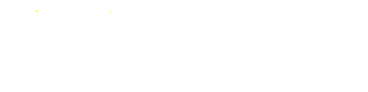

In [0]:
gen = datagen.flow(X_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

In [0]:
#Running the model again
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Reshape((3072,),input_shape=(32,32,3)))
model1.add(tf.keras.layers.BatchNormalization())

In [0]:
model1.add(tf.keras.layers.Dense(200, activation = 'relu'))
model1.add(tf.keras.layers.Dropout(0.25))
model1.add(tf.keras.layers.Dense(100, activation='relu'))

In [0]:
model1.add(tf.keras.layers.Dense(10, activation = 'relu'))
model1.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
model1.fit(X_train,Y_train,
         validation_data = (X_test, Y_test),
         epochs = 20,
         batch_size = 32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 7s 148us/sample - loss: 2.2106 - acc: 0.2575 - val_loss: 1.9751 - val_acc: 0.3061
Epoch 2/20
50000/50000 [==============================] - 7s 141us/sample - loss: 2.0275 - acc: 0.2756 - val_loss: 2.0067 - val_acc: 0.2626
Epoch 3/20
50000/50000 [==============================] - 7s 144us/sample - loss: 1.9831 - acc: 0.3120 - val_loss: 2.0605 - val_acc: 0.2525
Epoch 4/20
50000/50000 [==============================] - 7s 142us/sample - loss: 1.9921 - acc: 0.2964 - val_loss: 1.8760 - val_acc: 0.3633
Epoch 5/20
50000/50000 [==============================] - 7s 143us/sample - loss: 1.9360 - acc: 0.3365 - val_loss: 1.8231 - val_acc: 0.3739
Epoch 6/20
50000/50000 [==============================] - 7s 141us/sample - loss: 1.8653 - acc: 0.3550 - val_loss: 1.7710 - val_acc: 0.3984
Epoch 7/20
50000/50000 [==============================] - 7s 140us/sample - loss: 1.8381 - acc: 0.3609 - val_l